In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from collections import Counter
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [5]:
# Membaca data
df = pd.read_csv(r"D:\Prediksi Status Gizi\Notebook Pengerjaan\dataset status gizi balita.csv")
df.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
0,Laki-laki,35,2.8,49,10.5,72.2,Tidak,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
1,Laki-laki,44,3.0,49,7.1,72.2,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
2,Perempuan,47,2.8,49,7.0,92.7,Tidak,Pendek,Berat badan sangat kurang,Gizi buruk
3,Perempuan,41,3.0,49,7.1,73.5,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
4,Perempuan,42,2.8,49,10.0,65.0,Tidak,Sangat pendek,Berat badan kurang,Obesitas


In [6]:
data = df.copy()
data.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
0,Laki-laki,35,2.8,49,10.5,72.2,Tidak,Sangat pendek,Berat badan kurang,Berisiko gizi lebih
1,Laki-laki,44,3.0,49,7.1,72.2,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
2,Perempuan,47,2.8,49,7.0,92.7,Tidak,Pendek,Berat badan sangat kurang,Gizi buruk
3,Perempuan,41,3.0,49,7.1,73.5,Tidak,Sangat pendek,Berat badan sangat kurang,Gizi kurang
4,Perempuan,42,2.8,49,10.0,65.0,Tidak,Sangat pendek,Berat badan kurang,Obesitas


In [8]:
# Mengubah data kategorikal ke numerik menggunakan Label Encoding
encoders = {}
for col in ["Jenis_Kelamin", "Status_Pemberian_ASI", "Status_Berat_Badan", "Status_Tinggi_Badan", "Status_Gizi"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
for col_name, encoder in encoders.items():
    class_mapping = {idx: label for idx, label in enumerate(encoder.classes_)}
    print(f"Kolom '{col_name}':")
    print(class_mapping)
    print("-" * 50)

Kolom 'Jenis_Kelamin':
{0: 'Laki-laki', 1: 'Perempuan'}
--------------------------------------------------
Kolom 'Status_Pemberian_ASI':
{0: 'Tidak', 1: 'Ya'}
--------------------------------------------------
Kolom 'Status_Berat_Badan':
{0: 'Berat badan kurang', 1: 'Berat badan normal', 2: 'Berat badan sangat kurang', 3: 'Risiko berat badan lebih'}
--------------------------------------------------
Kolom 'Status_Tinggi_Badan':
{0: 'Normal', 1: 'Pendek', 2: 'Sangat pendek', 3: 'Tinggi'}
--------------------------------------------------
Kolom 'Status_Gizi':
{0: 'Berisiko gizi lebih', 1: 'Gizi baik', 2: 'Gizi buruk', 3: 'Gizi kurang', 4: 'Gizi lebih', 5: 'Obesitas'}
--------------------------------------------------


In [9]:
data.head()

,Jenis_Kelamin,Usia,Berat_Badan_Lahir,Tinggi_Badan_Lahir,Berat_Badan,Tinggi_Badan,Status_Pemberian_ASI,Status_Tinggi_Badan,Status_Berat_Badan,Status_Gizi
0,0,35,2.8,49,10.5,72.2,0,2,0,0
1,0,44,3.0,49,7.1,72.2,0,2,2,3
2,1,47,2.8,49,7.0,92.7,0,1,2,2
3,1,41,3.0,49,7.1,73.5,0,2,2,3
4,1,42,2.8,49,10.0,65.0,0,2,0,5


In [10]:
# Train Test Split 80:20
X = data.drop(columns=["Status_Gizi"])
y = data["Status_Gizi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Jumlah data train: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah data train: 6410
Jumlah data test: 1603


In [11]:
print("Data Train:")
print(X_train.head())
print(y_train.head())

Data Train:
      Jenis_Kelamin  Usia  Berat_Badan_Lahir  Tinggi_Badan_Lahir  Berat_Badan  \
4638              1    13                2.3                  50          7.0   
866               1    35                3.2                  50         15.0   
4689              0    15                2.9                  49          9.0   
4306              1    10                2.0                  49          6.2   
1397              1    10                3.0                  49          9.0   

      Tinggi_Badan  Status_Pemberian_ASI  Status_Tinggi_Badan  \
4638          73.5                     0                    0   
866           96.0                     0                    0   
4689          72.2                     0                    1   
4306          80.0                     0                    3   
1397          69.0                     0                    0   

      Status_Berat_Badan  
4638                   1  
866                    1  
4689                   1  
43

In [12]:
print("Data Test:")
print(X_test.head())
print(y_test.head())

Data Test:
      Jenis_Kelamin  Usia  Berat_Badan_Lahir  Tinggi_Badan_Lahir  Berat_Badan  \
6814              0     9                2.9                  49          9.0   
8004              0    17                3.4                  42          9.0   
5741              0    12                3.1                  49          9.0   
3092              0    12                2.9                  49          8.4   
3961              0     7                3.0                  49          8.5   

      Tinggi_Badan  Status_Pemberian_ASI  Status_Tinggi_Badan  \
6814          63.0                     0                    2   
8004          71.0                     1                    2   
5741          92.7                     0                    3   
3092          49.0                     0                    2   
3961          68.3                     0                    0   

      Status_Berat_Badan  
6814                   1  
8004                   1  
5741                   1  
309

In [13]:
# Menggunakan metode Adaptive Synthetic Sampling Approach (ADASYN)
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

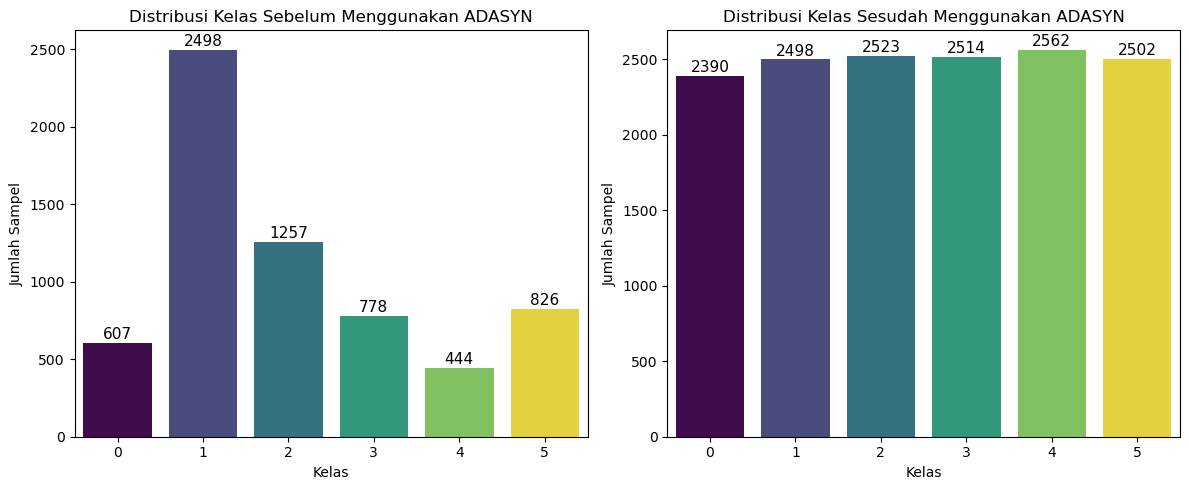

In [14]:
# Visualisasi distribusi data sebelum dan sesudah menggunakan ADASYN
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# sebelum menggunakan ADASYN
sns.countplot(x=y_train, ax=axes[0], hue=y_train, palette="viridis", legend=False)
axes[0].set_title("Distribusi Kelas Sebelum Menggunakan ADASYN")
axes[0].set_xlabel("Kelas")
axes[0].set_ylabel("Jumlah Sampel")

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black',
                     xytext=(0, 6), textcoords='offset points')

# sesudah menggunakan ADASYN
sns.countplot(x=y_train_resampled, ax=axes[1], hue=y_train_resampled, palette="viridis", legend=False)
axes[1].set_title("Distribusi Kelas Sesudah Menggunakan ADASYN")
axes[1].set_xlabel("Kelas")
axes[1].set_ylabel("Jumlah Sampel")

for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black',
                     xytext=(0, 6), textcoords='offset points')

plt.tight_layout()
plt.show()


# Model Default Parameters

In [15]:
# Model Catboost default parameters
modeldefault_CB = CatBoostClassifier()
modeldefault_CB.fit(X_train, y_train)

y_predCB = modeldefault_CB.predict(X_test)

Learning rate set to 0.086991
0:	learn: 1.5956261	total: 189ms	remaining: 3m 8s
1:	learn: 1.4544805	total: 203ms	remaining: 1m 41s
2:	learn: 1.3681646	total: 215ms	remaining: 1m 11s
3:	learn: 1.2700844	total: 225ms	remaining: 56s
4:	learn: 1.2015666	total: 235ms	remaining: 46.8s
5:	learn: 1.1198726	total: 246ms	remaining: 40.8s
6:	learn: 1.0556281	total: 257ms	remaining: 36.4s
7:	learn: 0.9914288	total: 268ms	remaining: 33.3s
8:	learn: 0.9502197	total: 279ms	remaining: 30.8s
9:	learn: 0.8909109	total: 290ms	remaining: 28.7s
10:	learn: 0.8425858	total: 300ms	remaining: 27s
11:	learn: 0.8043594	total: 311ms	remaining: 25.6s
12:	learn: 0.7653637	total: 321ms	remaining: 24.4s
13:	learn: 0.7293021	total: 332ms	remaining: 23.3s
14:	learn: 0.7092144	total: 341ms	remaining: 22.4s
15:	learn: 0.6844551	total: 352ms	remaining: 21.6s
16:	learn: 0.6645069	total: 362ms	remaining: 21s
17:	learn: 0.6351408	total: 373ms	remaining: 20.3s
18:	learn: 0.6153074	total: 382ms	remaining: 19.7s
19:	learn: 0.59

In [16]:
# Hasil evaluasi model catboost default parameters
print("\nClassification Report:")
print(classification_report(y_test, y_predCB, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.98013   0.97368   0.97690       152
           1    0.98257   0.99359   0.98805       624
           2    0.99679   0.99045   0.99361       314
           3    0.96429   0.96923   0.96675       195
           4    0.99083   0.97297   0.98182       111
           5    1.00000   0.98551   0.99270       207

    accuracy                        0.98565      1603
   macro avg    0.98577   0.98091   0.98330      1603
weighted avg    0.98572   0.98565   0.98566      1603



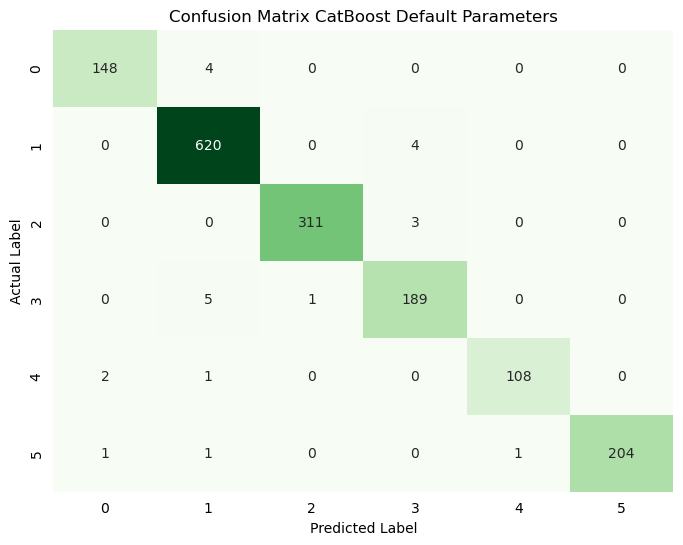

In [17]:
# Confusion Matrix CatBoost default parameters
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predCB),
            annot=True,
            fmt='d',
            cmap='Greens',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix CatBoost Default Parameters")
plt.tick_params(left=False, bottom=False)
plt.show()

In [18]:
# Model KNN default parameters
modeldefault_KNN = KNeighborsClassifier()

modeldefault_KNN.fit(X_train, y_train)

y_predKNN = modeldefault_KNN.predict(X_test)

# Hasil evaluasi model KNN default parameters
print("\nClassification Report:")
print(classification_report(y_test, y_predKNN, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.67586   0.64474   0.65993       152
           1    0.86082   0.91186   0.88560       624
           2    0.90820   0.88217   0.89499       314
           3    0.70466   0.69744   0.70103       195
           4    0.70192   0.65766   0.67907       111
           5    0.94872   0.89372   0.92040       207

    accuracy                        0.83468      1603
   macro avg    0.80003   0.78126   0.79017      1603
weighted avg    0.83391   0.83468   0.83378      1603



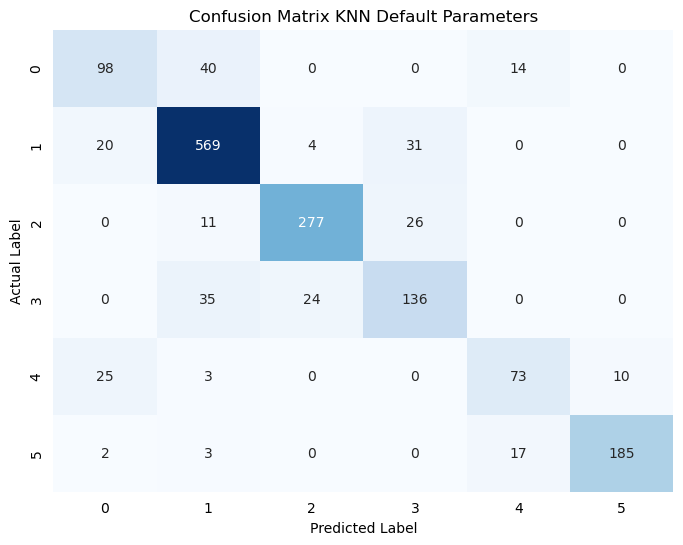

In [19]:
# Confusion Matrix KNN default parameters
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predKNN),
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix KNN Default Parameters")
plt.tick_params(left=False, bottom=False)
plt.show()

In [20]:
# CatBoost metrics (macro)
acc_cb1 = accuracy_score(y_test, y_predCB)
f1_cb1 = f1_score(y_test, y_predCB, average='macro')
recall_cb1 = recall_score(y_test, y_predCB, average='macro')
prec_cb1 = precision_score(y_test, y_predCB, average='macro')

# KNN metrics (macro)
acc_knn1 = accuracy_score(y_test, y_predKNN)
f1_knn1 = f1_score(y_test, y_predKNN, average='macro')
recall_knn1 = recall_score(y_test, y_predKNN, average='macro')
prec_knn1 = precision_score(y_test, y_predKNN, average='macro')

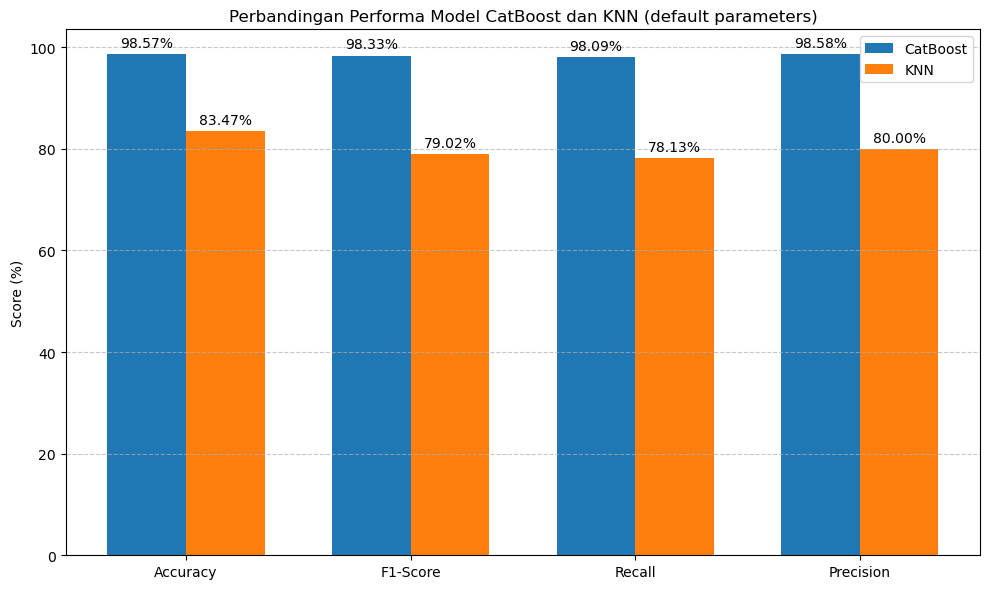

In [21]:
# Visualisasi perbandingan hasil evaluasi model CatBoost dan KNN (default parameters)
cb_scores = [acc_cb1, f1_cb1, recall_cb1, prec_cb1]
knn_scores = [acc_knn1, f1_knn1, recall_knn1, prec_knn1]

labels = ['Accuracy', 'F1-Score', 'Recall', 'Precision']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, [s * 100 for s in cb_scores], width, label='CatBoost')
bars2 = ax.bar(x + width/2, [s * 100 for s in knn_scores], width, label='KNN')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',  
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score (%)')
ax.set_title('Perbandingan Performa Model CatBoost dan KNN (default parameters)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Model dengan Oversampling

In [22]:
# Model Catboost dengan Oversampling 
modelcb_adasyn = CatBoostClassifier(verbose=100)
modelcb_adasyn.fit(X_train_resampled, y_train_resampled)

y_predcb_adasyn = modelcb_adasyn.predict(X_test)

Learning rate set to 0.090842
0:	learn: 1.6188088	total: 27.2ms	remaining: 27.2s
100:	learn: 0.2183608	total: 1.66s	remaining: 14.8s
200:	learn: 0.1130990	total: 3.02s	remaining: 12s
300:	learn: 0.0725851	total: 4.23s	remaining: 9.83s
400:	learn: 0.0527743	total: 5.46s	remaining: 8.16s
500:	learn: 0.0419691	total: 6.69s	remaining: 6.66s
600:	learn: 0.0340554	total: 7.95s	remaining: 5.28s
700:	learn: 0.0287782	total: 9.26s	remaining: 3.95s
800:	learn: 0.0243443	total: 10.5s	remaining: 2.61s
900:	learn: 0.0210934	total: 11.7s	remaining: 1.29s
999:	learn: 0.0187646	total: 12.9s	remaining: 0us


In [23]:
# Hasil evaluasi model CatBoost dengan Oversampling 
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_adasyn, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.98013   0.97368   0.97690       152
           1    0.98880   0.99038   0.98959       624
           2    0.99681   0.99363   0.99522       314
           3    0.96465   0.97949   0.97201       195
           4    0.99083   0.97297   0.98182       111
           5    0.99034   0.99034   0.99034       207

    accuracy                        0.98690      1603
   macro avg    0.98526   0.98342   0.98431      1603
weighted avg    0.98695   0.98690   0.98691      1603



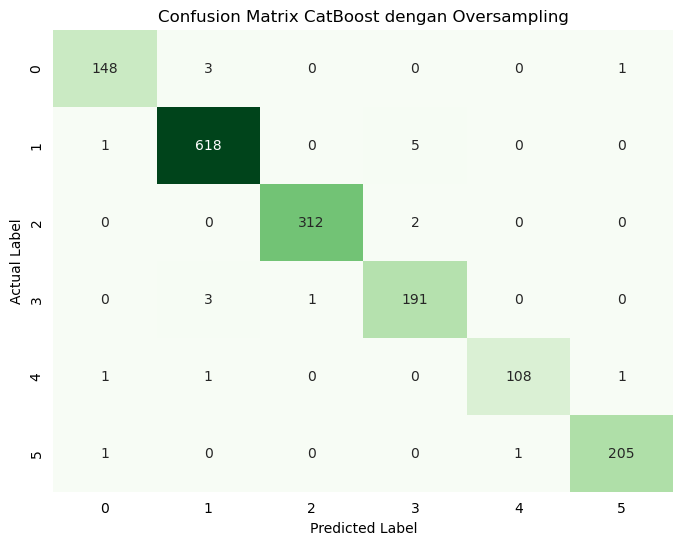

In [24]:
# Confusion Matrix CatBoost dengan Oversampling
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predcb_adasyn),
            annot=True,
            fmt='d',
            cmap='Greens',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix CatBoost dengan Oversampling")
plt.tick_params(left=False, bottom=False)
plt.show()

In [25]:
# Model KNN dengan Oversampling
modelknn_adasyn = KNeighborsClassifier()
modelknn_adasyn.fit(X_train_resampled, y_train_resampled)

y_predknn_adasyn = modelknn_adasyn.predict(X_test)

# Hasil evaluasi model KNN dengan Oversampling
print("\nClassification Report:")
print(classification_report(y_test, y_predknn_adasyn, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.66839   0.84868   0.74783       152
           1    0.96055   0.78045   0.86118       624
           2    0.93333   0.93631   0.93482       314
           3    0.64906   0.88205   0.74783       195
           4    0.77778   0.81982   0.79825       111
           5    0.95146   0.94686   0.94915       207

    accuracy                        0.85402      1603
   macro avg    0.82343   0.86903   0.83984      1603
weighted avg    0.87579   0.85402   0.85807      1603



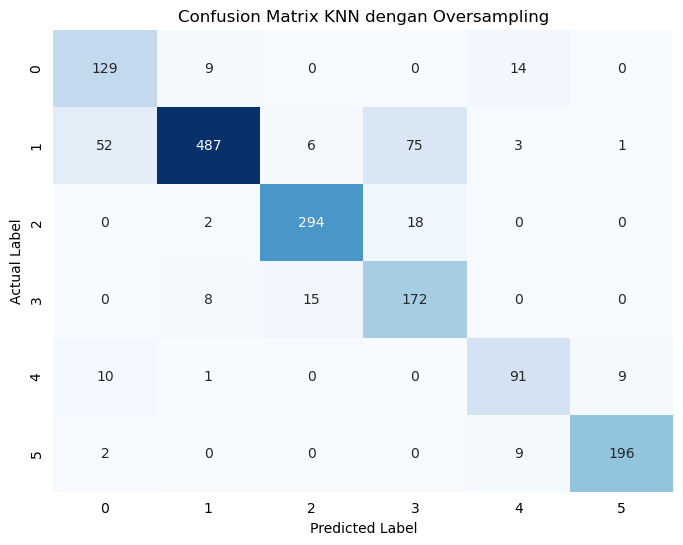

In [26]:
# Confusion Matrix KNN dengan Oversampling
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predknn_adasyn),
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix KNN dengan Oversampling")
plt.tick_params(left=False, bottom=False)
plt.show()

In [29]:
# CatBoost metrics (macro)
acc_cb2 = accuracy_score(y_test, y_predcb_adasyn)
f1_cb2 = f1_score(y_test, y_predcb_adasyn, average='macro')
recall_cb2 = recall_score(y_test, y_predcb_adasyn, average='macro')
prec_cb2 = precision_score(y_test, y_predcb_adasyn, average='macro')

# KNN metrics (macro)
acc_knn2 = accuracy_score(y_test, y_predknn_adasyn)
f1_knn2 = f1_score(y_test, y_predknn_adasyn, average='macro')
recall_knn2 = recall_score(y_test, y_predknn_adasyn, average='macro')
prec_knn2 = precision_score(y_test, y_predknn_adasyn, average='macro')

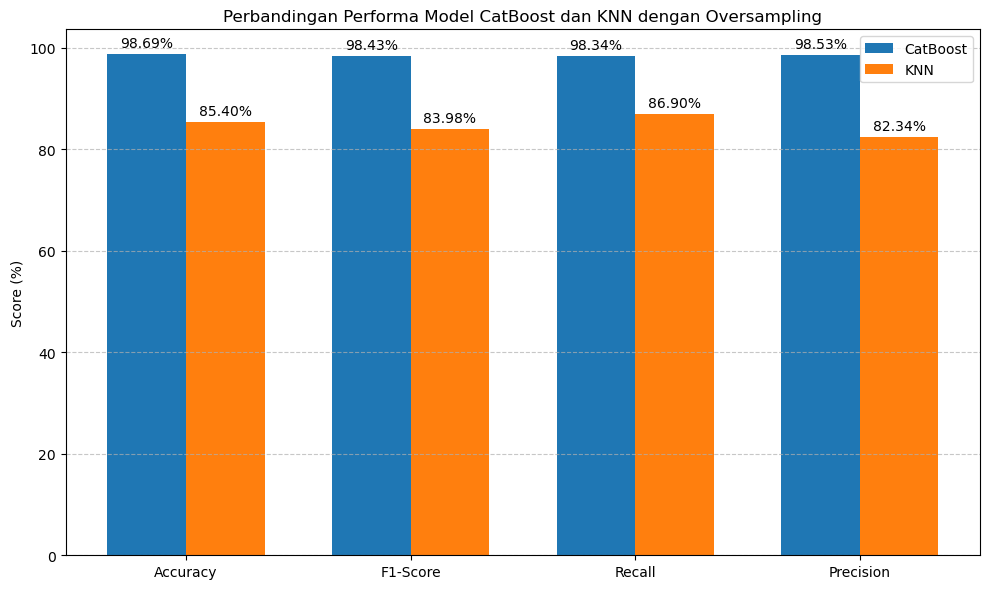

In [31]:
# Visualisasi perbandingan hasil evaluasi model CatBoost dan KNN (dengan Oversampling)
cb_scores2 = [acc_cb2, f1_cb2, recall_cb2, prec_cb2]
knn_scores2 = [acc_knn2, f1_knn2, recall_knn2, prec_knn2]
labels = ['Accuracy', 'F1-Score', 'Recall', 'Precision']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, [s * 100 for s in cb_scores2], width, label='CatBoost')
bars2 = ax.bar(x + width/2, [s * 100 for s in knn_scores2], width, label='KNN')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',  
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
ax.set_ylabel('Score (%)')
ax.set_title('Perbandingan Performa Model CatBoost dan KNN dengan Oversampling')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Pencarian Parameter Terbaik

In [ ]:
# Pencarian parameter terbaik model CatBoost dengan Oversampling menggunakan Grid SearchCV
modelcb_tuning = CatBoostClassifier(iterations=1000, verbose=100)

param_cb = {
    'learning_rate': [0.1, 0.01, 0.001],
     'depth': [4, 5, 6, 7, 8]
}
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_cb = GridSearchCV(
    estimator=modelcb_tuning,
    param_grid=param_cb,
    cv=kfold
)
grid_search_cb.fit(X_train_resampled, y_train_resampled)

best_modelcb = grid_search_cb.best_estimator_
print("Best Parameters:", grid_search_cb.best_params_)

0:	learn: 1.6380923	total: 8.96ms	remaining: 8.95s
100:	learn: 0.3262673	total: 606ms	remaining: 5.39s
200:	learn: 0.1870349	total: 1.22s	remaining: 4.84s
300:	learn: 0.1280655	total: 1.8s	remaining: 4.18s
400:	learn: 0.0983688	total: 2.37s	remaining: 3.55s
500:	learn: 0.0774406	total: 2.95s	remaining: 2.94s
600:	learn: 0.0637050	total: 3.52s	remaining: 2.34s
700:	learn: 0.0551660	total: 4.09s	remaining: 1.75s
800:	learn: 0.0481705	total: 4.68s	remaining: 1.16s
900:	learn: 0.0424101	total: 5.31s	remaining: 584ms
999:	learn: 0.0381392	total: 5.87s	remaining: 0us
0:	learn: 1.6392926	total: 7.23ms	remaining: 7.22s
100:	learn: 0.3293204	total: 595ms	remaining: 5.3s
200:	learn: 0.1854627	total: 1.18s	remaining: 4.69s
300:	learn: 0.1263331	total: 1.76s	remaining: 4.08s
400:	learn: 0.0952028	total: 2.33s	remaining: 3.48s
500:	learn: 0.0758527	total: 2.91s	remaining: 2.9s
600:	learn: 0.0631774	total: 3.48s	remaining: 2.31s
700:	learn: 0.0544655	total: 4.05s	remaining: 1.73s
800:	learn: 0.04668

In [20]:
results = pd.DataFrame(grid_search_cb.cv_results_)
tabel_hasilCB = results[['param_learning_rate', 'param_depth', 'mean_test_score', 'rank_test_score']]
tabel_hasilCB = tabel_hasilCB.sort_values(by='rank_test_score')
tabel_hasilCB = tabel_hasilCB.reset_index(drop=True)

print("\nTabel Hasil GridSearch CatBoost:")
print(tabel_hasilCB)


Tabel Hasil GridSearch CatBoost:
   param_learning_rate param_depth  mean_test_score  rank_test_score
0                  0.1           8         0.995063                1
1                  0.1           7         0.994796                2
2                  0.1           6         0.994196                3
3                  0.1           5         0.993929                4
4                  0.1           4         0.992461                5
5                 0.01           8         0.980786                6
6                 0.01           7         0.976716                7
7                 0.01           6         0.971913                8
8                 0.01           5         0.964307                9
9                 0.01           4         0.954367               10
10               0.001           8         0.892855               11
11               0.001           7         0.882247               12
12               0.001           6         0.862566               13


In [ ]:
# prediksi menggunakan parameter terbaik hasil Grid SearchCV pada model CatBoost Oversampling
y_predcb_tuning = best_modelcb.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_tuning, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.97368   0.97368   0.97368       152
           1    0.98565   0.99038   0.98801       624
           2    0.99679   0.99045   0.99361       314
           3    0.95939   0.96923   0.96429       195
           4    0.99083   0.97297   0.98182       111
           5    0.99515   0.99034   0.99274       207

    accuracy                        0.98503      1603
   macro avg    0.98358   0.98118   0.98236      1603
weighted avg    0.98509   0.98503   0.98504      1603



Hasil evaluasi menggunakan parameter terbaik dari Grid Search berdasarkan rata-rata skor pengujian (mean test score) dari 10-fold cross-validation belum menunjukkan peningkatan performa dibandingkan model CatBoost dengan Oversampling. Oleh karena itu, dilakukan percobaan terhadap 5 kombinasi parameter terbaik pada data uji (test data)

In [22]:
# kombinasi parameter terbaik 1
modelcb_pr1 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=8,
verbose=100)

modelcb_pr1.fit(X_train_resampled, y_train_resampled)

y_predcb_pr1 = modelcb_pr1.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr1, digits=5))

0:	learn: 1.5536084	total: 39.7ms	remaining: 39.6s
100:	learn: 0.1447830	total: 3.92s	remaining: 34.8s
200:	learn: 0.0663986	total: 7.77s	remaining: 30.9s
300:	learn: 0.0418517	total: 11.4s	remaining: 26.4s
400:	learn: 0.0306768	total: 14.9s	remaining: 22.3s
500:	learn: 0.0231940	total: 18.6s	remaining: 18.5s
600:	learn: 0.0188046	total: 22.4s	remaining: 14.9s
700:	learn: 0.0156150	total: 26.3s	remaining: 11.2s
800:	learn: 0.0132806	total: 30.1s	remaining: 7.47s
900:	learn: 0.0115476	total: 34s	remaining: 3.73s
999:	learn: 0.0102819	total: 38.1s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0    0.97368   0.97368   0.97368       152
           1    0.98565   0.99038   0.98801       624
           2    0.99679   0.99045   0.99361       314
           3    0.95939   0.96923   0.96429       195
           4    0.99083   0.97297   0.98182       111
           5    0.99515   0.99034   0.99274       207

    accuracy                 

In [23]:
# kombinasi parameter terbaik 2
modelcb_pr2 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=7,
verbose=100)

modelcb_pr2.fit(X_train_resampled, y_train_resampled)

y_predcb_pr2 = modelcb_pr2.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr2, digits=5))

0:	learn: 1.5918169	total: 26ms	remaining: 26s
100:	learn: 0.1680429	total: 2.46s	remaining: 21.9s
200:	learn: 0.0814811	total: 4.84s	remaining: 19.3s
300:	learn: 0.0511847	total: 7.51s	remaining: 17.4s
400:	learn: 0.0366072	total: 10.2s	remaining: 15.2s
500:	learn: 0.0282841	total: 12.6s	remaining: 12.5s
600:	learn: 0.0232598	total: 14.8s	remaining: 9.85s
700:	learn: 0.0191977	total: 17.1s	remaining: 7.3s
800:	learn: 0.0164504	total: 19.4s	remaining: 4.82s
900:	learn: 0.0142187	total: 21.8s	remaining: 2.39s
999:	learn: 0.0123039	total: 24.2s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0    0.96732   0.97368   0.97049       152
           1    0.98726   0.99359   0.99042       624
           2    0.99678   0.98726   0.99200       314
           3    0.96447   0.97436   0.96939       195
           4    0.99083   0.97297   0.98182       111
           5    1.00000   0.99034   0.99515       207

    accuracy                    

In [24]:
# kombinasi parameter terbaik 3
modelcb_pr3 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=6,
verbose=100)

modelcb_pr3.fit(X_train_resampled, y_train_resampled)

y_predcb_pr3 = modelcb_pr3.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr3, digits=5))

0:	learn: 1.6024091	total: 17.4ms	remaining: 17.4s
100:	learn: 0.2051961	total: 1.23s	remaining: 10.9s
200:	learn: 0.1035990	total: 2.38s	remaining: 9.45s
300:	learn: 0.0682940	total: 3.56s	remaining: 8.27s
400:	learn: 0.0492701	total: 4.73s	remaining: 7.06s
500:	learn: 0.0380723	total: 5.96s	remaining: 5.93s
600:	learn: 0.0309893	total: 7.56s	remaining: 5.02s
700:	learn: 0.0257905	total: 8.91s	remaining: 3.8s
800:	learn: 0.0220098	total: 10.2s	remaining: 2.54s
900:	learn: 0.0191733	total: 11.6s	remaining: 1.27s
999:	learn: 0.0171740	total: 12.9s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0    0.96104   0.97368   0.96732       152
           1    0.99038   0.99038   0.99038       624
           2    0.99681   0.99363   0.99522       314
           3    0.96954   0.97949   0.97449       195
           4    0.99074   0.96396   0.97717       111
           5    0.99034   0.99034   0.99034       207

    accuracy                

In [25]:
# kombinasi parameter terbaik 4
modelcb_pr4 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=5,
verbose=100)

modelcb_pr4.fit(X_train_resampled, y_train_resampled)

y_predcb_pr4 = modelcb_pr4.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr4, digits=5))

0:	learn: 1.6238517	total: 13.3ms	remaining: 13.2s


100:	learn: 0.2473777	total: 989ms	remaining: 8.81s
200:	learn: 0.1367698	total: 1.93s	remaining: 7.69s
300:	learn: 0.0903690	total: 2.82s	remaining: 6.55s
400:	learn: 0.0654211	total: 3.79s	remaining: 5.67s
500:	learn: 0.0527020	total: 4.67s	remaining: 4.65s
600:	learn: 0.0417271	total: 5.53s	remaining: 3.67s
700:	learn: 0.0357182	total: 6.38s	remaining: 2.72s
800:	learn: 0.0310483	total: 7.23s	remaining: 1.8s
900:	learn: 0.0268883	total: 8.08s	remaining: 888ms
999:	learn: 0.0239026	total: 8.94s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0    0.97386   0.98026   0.97705       152
           1    0.98882   0.99199   0.99040       624
           2    0.99681   0.99363   0.99522       314
           3    0.97423   0.96923   0.97172       195
           4    0.99091   0.98198   0.98643       111
           5    0.99517   0.99517   0.99517       207

    accuracy                        0.98815      1603
   macro avg    0.98663  

In [26]:
# kombinasi parameter terbaik 5
modelcb_pr5 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=4,
verbose=100)

modelcb_pr5.fit(X_train_resampled, y_train_resampled)

y_predcb_pr5 = modelcb_pr5.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr5, digits=5))

0:	learn: 1.6538099	total: 10.2ms	remaining: 10.2s
100:	learn: 0.3282952	total: 670ms	remaining: 5.96s
200:	learn: 0.1878295	total: 1.32s	remaining: 5.26s
300:	learn: 0.1276625	total: 2s	remaining: 4.65s
400:	learn: 0.0940383	total: 2.71s	remaining: 4.05s
500:	learn: 0.0758331	total: 3.38s	remaining: 3.37s
600:	learn: 0.0622975	total: 4.12s	remaining: 2.73s
700:	learn: 0.0521069	total: 4.89s	remaining: 2.08s
800:	learn: 0.0450429	total: 5.66s	remaining: 1.41s
900:	learn: 0.0400980	total: 6.35s	remaining: 698ms
999:	learn: 0.0366464	total: 7.03s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0    0.96129   0.98026   0.97068       152
           1    0.99354   0.98558   0.98954       624
           2    0.99363   0.99363   0.99363       314
           3    0.96447   0.97436   0.96939       195
           4    0.99083   0.97297   0.98182       111
           5    0.98565   0.99517   0.99038       207

    accuracy                  

Berdasarkan hasil percobaan terhadap lima kombinasi parameter terbaik yang diperoleh dari nilai mean test score, diperoleh bahwa kombinasi parameter ke-4 menghasilkan nilai akurasi, f1-score, recall, dan precision yang lebih tinggi dibandingkan empat kombinasi lainnya. Oleh karena itu, model yang digunakan adalah model dengan kombinasi parameter ke-4, yaitu learning_rate sebesar 0.1 dan depth sebesar 5. Setelah mendapatkan kombinasi hyperparameter terbaik, selanjutnya dilakukan pengujian performa model dengan validasi menggunakan metode k-fold cross validation dengan nilai k=10

In [27]:
from sklearn.model_selection import cross_val_score, KFold
# Validasi Model
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelcb_pr4, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print("Akurasi per fold:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.5f}")

print(f"\nRata-rata Akurasi: {cv_scores.mean():.5f}")

0:	learn: 1.6151877	total: 13.8ms	remaining: 13.8s
100:	learn: 0.2519452	total: 898ms	remaining: 7.99s
200:	learn: 0.1350994	total: 1.7s	remaining: 6.76s
300:	learn: 0.0914898	total: 2.51s	remaining: 5.84s
400:	learn: 0.0688162	total: 3.35s	remaining: 5s
500:	learn: 0.0535549	total: 4.26s	remaining: 4.24s
600:	learn: 0.0442506	total: 5.08s	remaining: 3.38s
700:	learn: 0.0373148	total: 5.89s	remaining: 2.51s
800:	learn: 0.0321203	total: 6.69s	remaining: 1.66s
900:	learn: 0.0284154	total: 7.54s	remaining: 828ms
999:	learn: 0.0247114	total: 8.34s	remaining: 0us
0:	learn: 1.6165887	total: 11.8ms	remaining: 11.8s
100:	learn: 0.2597915	total: 926ms	remaining: 8.24s
200:	learn: 0.1376098	total: 1.82s	remaining: 7.26s
300:	learn: 0.0928393	total: 2.73s	remaining: 6.35s
400:	learn: 0.0683764	total: 3.61s	remaining: 5.4s
500:	learn: 0.0541045	total: 4.46s	remaining: 4.45s
600:	learn: 0.0442641	total: 5.28s	remaining: 3.5s
700:	learn: 0.0366387	total: 6.1s	remaining: 2.6s
800:	learn: 0.0316014	to

In [ ]:
# Pencarian parameter terbaik model KNN dengan Oversampling menggunakan Grid SearchCV
modelknn_tuning = KNeighborsClassifier()
param_knn = {
    'n_neighbors': list(range(3, 30, 2)),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]  # Manhattan, Euclidean, Minkowski
}
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(
    estimator=modelknn_tuning,
    param_grid=param_knn,
    cv=kfold
)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

best_modelknn = grid_search_knn.best_estimator_
print("Best Parameters:", grid_search_knn.best_params_)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [29]:
results = pd.DataFrame(grid_search_knn.cv_results_)
tabel_hasilknn = results[['param_n_neighbors', 'param_weights', 'param_p', 'mean_test_score', 'rank_test_score']]
tabel_hasilknn = tabel_hasilknn.sort_values(by='rank_test_score')
tabel_hasilknn = tabel_hasilknn.reset_index(drop=True)

print("\nTabel Hasil GridSearch KNN:")
print(tabel_hasilknn)


Tabel Hasil GridSearch KNN:
   param_n_neighbors param_weights param_p  mean_test_score  rank_test_score
0                  3      distance       1         0.968644                1
1                  5      distance       1         0.964040                2
2                  3      distance       2         0.963373                3
3                  3      distance       3         0.961038                4
4                  7      distance       1         0.960838                5
..               ...           ...     ...              ...              ...
79                27       uniform       2         0.823604               80
80                25       uniform       3         0.820669               81
81                29       uniform       2         0.817266               82
82                27       uniform       3         0.810128               83
83                29       uniform       3         0.805658               84

[84 rows x 5 columns]


In [ ]:
# prediksi menggunakan parameter terbaik hasil Grid SearchCV pada model KNN Oversampling
y_predknn_tuning = best_modelknn.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_predknn_tuning, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.82036   0.90132   0.85893       152
           1    0.96187   0.88942   0.92423       624
           2    0.96405   0.93949   0.95161       314
           3    0.74576   0.90256   0.81671       195
           4    0.85981   0.82883   0.84404       111
           5    0.94286   0.95652   0.94964       207

    accuracy                        0.90643      1603
   macro avg    0.88245   0.90302   0.89086      1603
weighted avg    0.91307   0.90643   0.90805      1603



Sama halnya dengan model CatBoost, pada model KNN juga dilakukan percobaan terhadap 5 kombinasi parameter terbaik berdasarkan hasil Grid Search, yang kemudian diuji pada data uji (test data) untuk mengevaluasi performanya.

In [31]:
# Kombinasi parameter terbaik 1
modelknn_pr1 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=1
) 
modelknn_pr1.fit(X_train_resampled, y_train_resampled)

y_predknn_pr1 = modelknn_pr1.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr1, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.82036   0.90132   0.85893       152
           1    0.96187   0.88942   0.92423       624
           2    0.96405   0.93949   0.95161       314
           3    0.74576   0.90256   0.81671       195
           4    0.85981   0.82883   0.84404       111
           5    0.94286   0.95652   0.94964       207

    accuracy                        0.90643      1603
   macro avg    0.88245   0.90302   0.89086      1603
weighted avg    0.91307   0.90643   0.90805      1603



In [32]:
# Kombinasi parameter terbaik 2
modelknn_pr2 = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    p=1
) 
modelknn_pr2.fit(X_train_resampled, y_train_resampled)

y_predknn_pr2 = modelknn_pr2.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr2, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.80000   0.89474   0.84472       152
           1    0.97117   0.86378   0.91433       624
           2    0.95484   0.94268   0.94872       314
           3    0.71545   0.90256   0.79819       195
           4    0.83784   0.83784   0.83784       111
           5    0.94313   0.96135   0.95215       207

    accuracy                        0.89769      1603
   macro avg    0.87040   0.90049   0.88266      1603
weighted avg    0.90778   0.89769   0.89993      1603



In [33]:
# Kombinasi parameter terbaik 3
modelknn_pr3 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=2
) 
modelknn_pr3.fit(X_train_resampled, y_train_resampled)

y_predknn_pr3 = modelknn_pr3.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr3, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.77246   0.84868   0.80878       152
           1    0.95431   0.87019   0.91031       624
           2    0.95765   0.93631   0.94686       314
           3    0.71901   0.89231   0.79634       195
           4    0.83178   0.80180   0.81651       111
           5    0.94313   0.96135   0.95215       207

    accuracy                        0.89083      1603
   macro avg    0.86305   0.88511   0.87183      1603
weighted avg    0.89917   0.89083   0.89289      1603



In [34]:
# Kombinasi parameter terbaik 4
modelknn_pr4 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=3
) 
modelknn_pr4.fit(X_train_resampled, y_train_resampled)

y_predknn_pr4 = modelknn_pr4.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr4, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.77914   0.83553   0.80635       152
           1    0.95130   0.87660   0.91243       624
           2    0.96078   0.93631   0.94839       314
           3    0.72917   0.89744   0.80460       195
           4    0.81818   0.81081   0.81448       111
           5    0.94737   0.95652   0.95192       207

    accuracy                        0.89270      1603
   macro avg    0.86432   0.88553   0.87303      1603
weighted avg    0.90009   0.89270   0.89461      1603



In [35]:
# Kombinasi parameter terbaik 5
modelknn_pr5 = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    p=1
) 
modelknn_pr5.fit(X_train_resampled, y_train_resampled)

y_predknn_pr5 = modelknn_pr5.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr5, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.76571   0.88158   0.81957       152
           1    0.97212   0.83814   0.90017       624
           2    0.96091   0.93949   0.95008       314
           3    0.69112   0.91795   0.78855       195
           4    0.83036   0.83784   0.83408       111
           5    0.94340   0.96618   0.95465       207

    accuracy                        0.88833      1603
   macro avg    0.86060   0.89686   0.87452      1603
weighted avg    0.90264   0.88833   0.89119      1603



Berdasarkan hasil percobaan terhadap lima kombinasi parameter terbaik yang diperoleh dari nilai mean test score, diperoleh bahwa kombinasi parameter ke-1 menghasilkan nilai akurasi, f1-score, recall, dan precision yang lebih tinggi dibandingkan empat kombinasi lainnya. Oleh karena itu, model yang digunakan adalah model dengan kombinasi parameter ke-1, yaitu n_neighbors sebesar 3, weights=distance dan p=1. Setelah mendapatkan kombinasi hyperparameter terbaik, selanjutnya dilakukan pengujian performa model dengan validasi menggunakan metode k-fold cross validation dengan nilai k=10

In [36]:
# Validasi Model KNN
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelknn_pr1, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print("Akurasi per fold:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.5f}")

print(f"\nRata-rata Akurasi: {cv_scores.mean():.5f}")

Akurasi per fold:
Fold 1: 0.97065
Fold 2: 0.96398
Fold 3: 0.97065
Fold 4: 0.96931
Fold 5: 0.96598
Fold 6: 0.97265
Fold 7: 0.96598
Fold 8: 0.96531
Fold 9: 0.97532
Fold 10: 0.96662

Rata-rata Akurasi: 0.96864


# Model dengan Oversampling dan Hyperparameter Tuning

In [32]:
# Model CatBoost dengan Oversampling dan Hyperparameter Tuning
modelcb_pr4 = CatBoostClassifier(iterations=1000,
learning_rate=0.1,
depth=5,
verbose=100)

modelcb_pr4.fit(X_train_resampled, y_train_resampled)

y_predcb_pr4 = modelcb_pr4.predict(X_test)

# Hasil evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predcb_pr4, digits=5))

0:	learn: 1.6238517	total: 17.1ms	remaining: 17.1s
100:	learn: 0.2473777	total: 1.23s	remaining: 10.9s
200:	learn: 0.1367698	total: 2.24s	remaining: 8.89s
300:	learn: 0.0903690	total: 3.12s	remaining: 7.24s
400:	learn: 0.0654211	total: 4.01s	remaining: 5.99s
500:	learn: 0.0527020	total: 5.05s	remaining: 5.03s
600:	learn: 0.0417271	total: 6.12s	remaining: 4.06s
700:	learn: 0.0357182	total: 7.09s	remaining: 3.02s
800:	learn: 0.0310483	total: 8.05s	remaining: 2s
900:	learn: 0.0268883	total: 9.14s	remaining: 1s
999:	learn: 0.0239026	total: 10.2s	remaining: 0us

Classification Report:
              precision    recall  f1-score   support

           0    0.97386   0.98026   0.97705       152
           1    0.98882   0.99199   0.99040       624
           2    0.99681   0.99363   0.99522       314
           3    0.97423   0.96923   0.97172       195
           4    0.99091   0.98198   0.98643       111
           5    0.99517   0.99517   0.99517       207

    accuracy                     

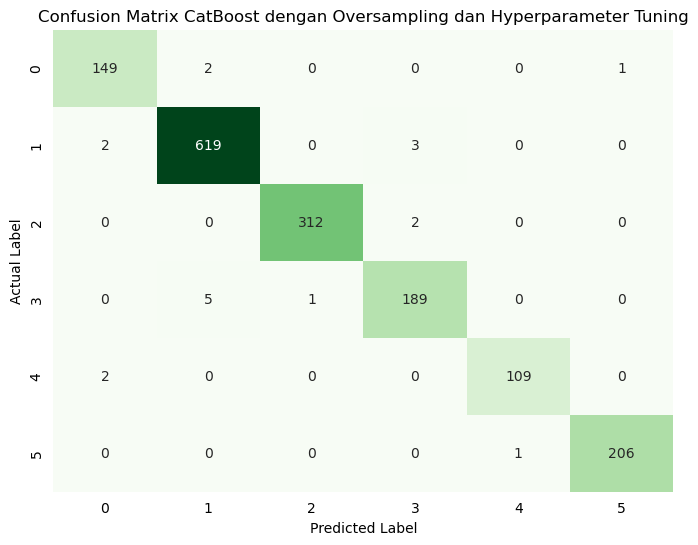

In [33]:
# Confusion Matrix Model CatBoost dengan Oversampling dan Hyperparameter Tuning
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predcb_pr4),
            annot=True,
            fmt='d',
            cmap='Greens',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix CatBoost dengan Oversampling dan Hyperparameter Tuning")
plt.tick_params(left=False, bottom=False)
plt.show()

In [34]:
# Model KNN dengan Oversampling dan Hyperparameter Tuning
modelknn_pr1 = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    p=1
) 
modelknn_pr1.fit(X_train_resampled, y_train_resampled)

y_predknn_pr1 = modelknn_pr1.predict(X_test)

# Hasil Evaluasi
print("\nClassification Report:")
print(classification_report(y_test, y_predknn_pr1, digits=5))


Classification Report:
              precision    recall  f1-score   support

           0    0.82036   0.90132   0.85893       152
           1    0.96187   0.88942   0.92423       624
           2    0.96405   0.93949   0.95161       314
           3    0.74576   0.90256   0.81671       195
           4    0.85981   0.82883   0.84404       111
           5    0.94286   0.95652   0.94964       207

    accuracy                        0.90643      1603
   macro avg    0.88245   0.90302   0.89086      1603
weighted avg    0.91307   0.90643   0.90805      1603



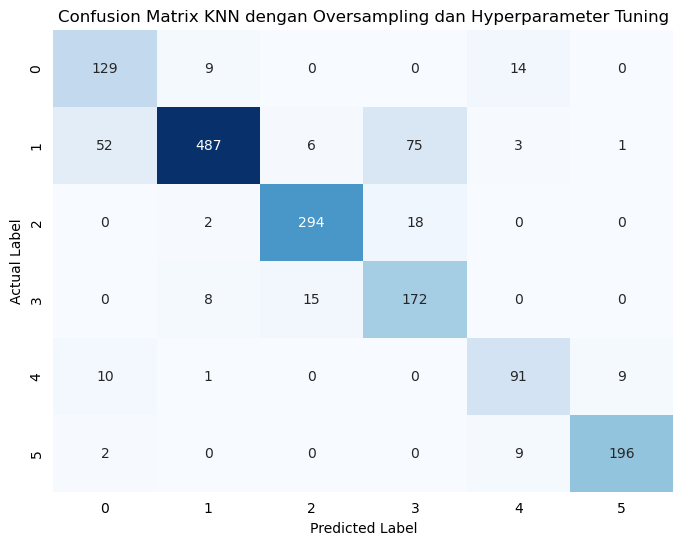

In [35]:
# Confusion Matrix KNN dengan ADASYN dan parameter tuning
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predknn_adasyn),
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False)        
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix KNN dengan Oversampling dan Hyperparameter Tuning")
plt.tick_params(left=False, bottom=False)
plt.show()

In [36]:
# CatBoost metrics (macro)
acc_cb3 = accuracy_score(y_test, y_predcb_pr4)
f1_cb3 = f1_score(y_test, y_predcb_pr4, average='macro')
recall_cb3 = recall_score(y_test, y_predcb_pr4, average='macro')
prec_cb3 = precision_score(y_test, y_predcb_pr4, average='macro')

# KNN metrics (macro)
acc_knn3 = accuracy_score(y_test, y_predknn_pr1)
f1_knn3 = f1_score(y_test, y_predknn_pr1, average='macro')
recall_knn3 = recall_score(y_test, y_predknn_pr1, average='macro')
prec_knn3 = precision_score(y_test, y_predknn_pr1, average='macro')


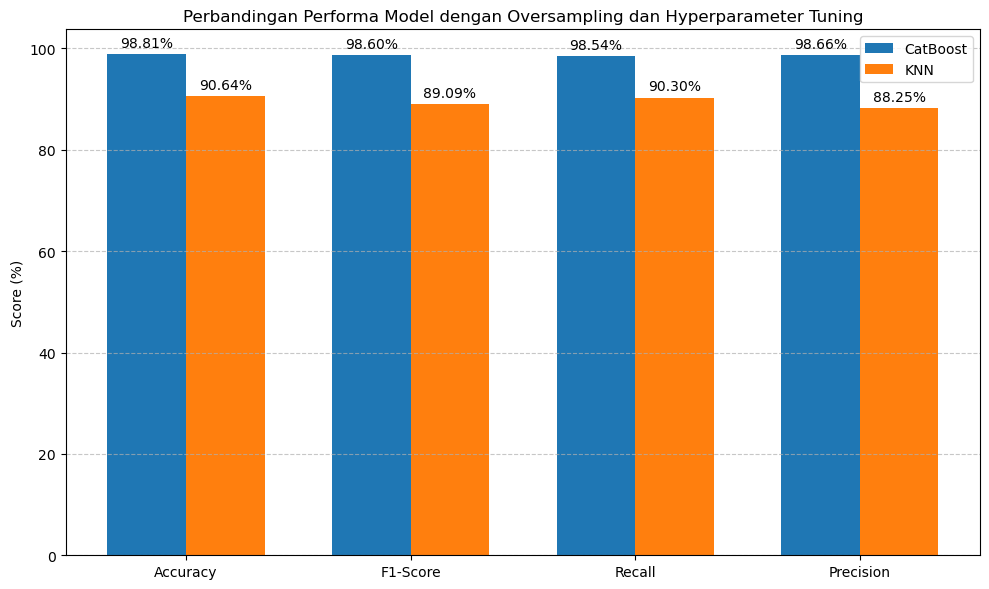

In [37]:
import matplotlib.pyplot as plt
import numpy as np

cb_scores3 = [acc_cb3, f1_cb3, recall_cb3, prec_cb3]
knn_scores3 = [acc_knn3, f1_knn3, recall_knn3, prec_knn3]

labels = ['Accuracy', 'F1-Score', 'Recall', 'Precision']

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, [s * 100 for s in cb_scores3], width, label='CatBoost')
bars2 = ax.bar(x + width/2, [s * 100 for s in knn_scores3], width, label='KNN')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score (%)')
ax.set_title('Perbandingan Performa Model dengan Oversampling dan Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Perbandingan Model CatBoost

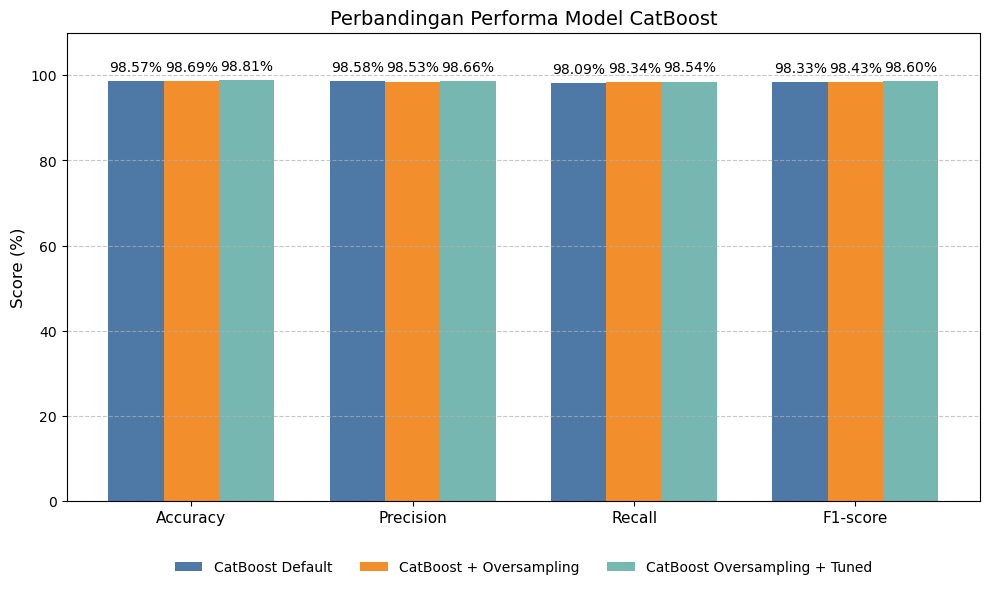

In [38]:
# Model CatBoost Default Parameters
metrics_default = [
    accuracy_score(y_test, y_predCB),
    precision_score(y_test, y_predCB, average='macro'),
    recall_score(y_test, y_predCB, average='macro'),
    f1_score(y_test, y_predCB, average='macro')
]

# Model CatBoost Oversampling
metrics_adasyn = [
    accuracy_score(y_test, y_predcb_adasyn),
    precision_score(y_test, y_predcb_adasyn, average='macro'),
    recall_score(y_test, y_predcb_adasyn, average='macro'),
    f1_score(y_test, y_predcb_adasyn, average='macro')
]

# Model CatBoost Oversampling dan Hyperparameter Tuning
metrics_best = [
    accuracy_score(y_test, y_predcb_pr4),
    precision_score(y_test, y_predcb_pr4, average='macro'),
    recall_score(y_test, y_predcb_pr4, average='macro'),
    f1_score(y_test, y_predcb_pr4, average='macro')
]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, [m*100 for m in metrics_default], width, label='CatBoost Default', color='#4E79A7')
bars2 = ax.bar(x, [m*100 for m in metrics_adasyn], width, label='CatBoost + Oversampling', color='#F28E2B')
bars3 = ax.bar(x + width, [m*100 for m in metrics_best], width, label='CatBoost Oversampling + Tuned', color='#76B7B2')

# Tambahkan angka di atas batang dengan annotate
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Perbandingan Performa Model CatBoost", fontsize=14)
ax.set_ylim(0, 110)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.tight_layout()
plt.show()

# Perbandingan Model KNN

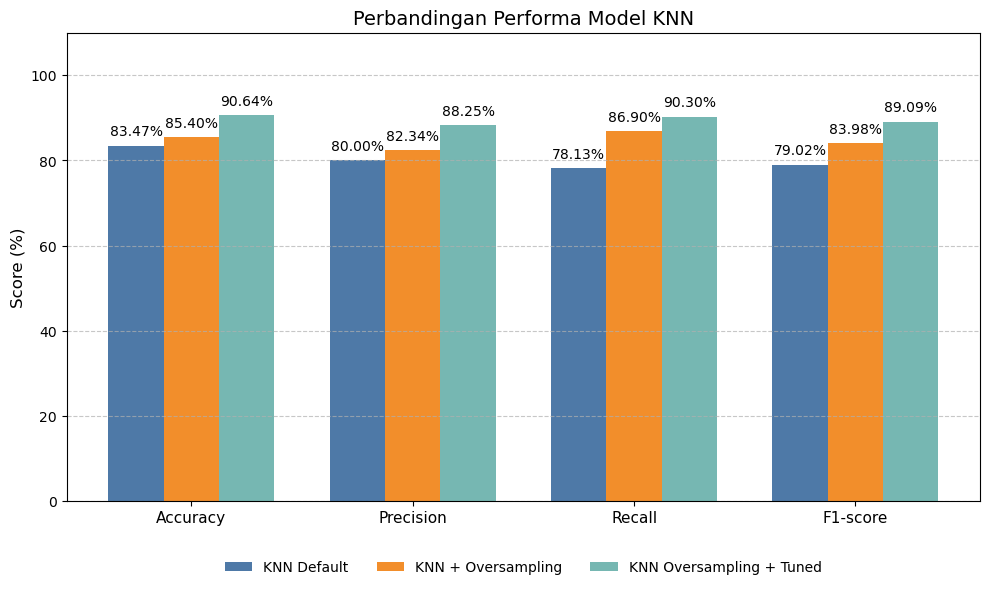

In [39]:
# Model KNN Default Parameters
metrics_default = [
    accuracy_score(y_test, y_predKNN),
    precision_score(y_test, y_predKNN, average='macro'),
    recall_score(y_test, y_predKNN, average='macro'),
    f1_score(y_test, y_predKNN, average='macro')
]

# Model KNN Oversampling
metrics_adasyn = [
    accuracy_score(y_test, y_predknn_adasyn),
    precision_score(y_test, y_predknn_adasyn, average='macro'),
    recall_score(y_test, y_predknn_adasyn, average='macro'),
    f1_score(y_test, y_predknn_adasyn, average='macro')
]

# Model KNN Oversampling dan Hyperparameter Tuning
metrics_best = [
    accuracy_score(y_test, y_predknn_pr1),
    precision_score(y_test, y_predknn_pr1, average='macro'),
    recall_score(y_test, y_predknn_pr1, average='macro'),
    f1_score(y_test, y_predknn_pr1, average='macro')
]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, [m*100 for m in metrics_default], width, label='KNN Default', color='#4E79A7')
bars2 = ax.bar(x, [m*100 for m in metrics_adasyn], width, label='KNN + Oversampling', color='#F28E2B')
bars3 = ax.bar(x + width, [m*100 for m in metrics_best], width, label='KNN Oversampling + Tuned', color='#76B7B2')

# Tambahkan angka di atas batang dengan annotate
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_title("Perbandingan Performa Model KNN", fontsize=14)
ax.set_ylim(0, 110)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.tight_layout()
plt.show()

# save model CatBoost

In [40]:
import pickle

In [41]:
with open('modelCB_default.sav', 'wb') as file:
    pickle.dump(modeldefault_CB, file)

In [42]:
with open('modelCB_oversampling.sav', 'wb') as file:
    pickle.dump(modelcb_adasyn, file)

In [43]:
with open('modelCB_terbaik.sav', 'wb') as file:
    pickle.dump(modelcb_pr4, file)

# Save Model KNN

In [44]:
with open('modelKNN_default.sav', 'wb') as file:
    pickle.dump(modeldefault_KNN, file)

In [45]:
with open('modelKNN_oversampling.sav', 'wb') as file:
    pickle.dump(modelknn_adasyn, file)

In [46]:
with open('modelKNN_terbaik.sav', 'wb') as file:
    pickle.dump(modelknn_pr1, file)